In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'X':[14,33,42,54,62,71],'Y':[1,3,4,5,6,4]}
df = pd.DataFrame(data)
df

,X,Y
0,14,1
1,33,3
2,42,4
3,54,5
4,62,6
5,71,4


In [3]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
df['X'] = scaler.fit_transform(df[['X']])
df

,X,Y
0,-1.688895,1
1,-0.686114,3
2,-0.211112,4
3,0.422224,5
4,0.844448,6
5,1.319450,4


In [6]:
from sklearn.linear_model import LinearRegression


In [7]:
modelo = LinearRegression()
type(modelo)

sklearn.linear_model._base.LinearRegression

In [8]:
modelo.fit(df[['X']],df['Y'])

LinearRegression()

In [9]:
df['RegLin'] = modelo.predict(df[['X']])
df

,X,Y,RegLin
0,-1.688895,1,1.619777
1,-0.686114,3,2.934076
2,-0.211112,4,3.556639
3,0.422224,5,4.386722
4,0.844448,6,4.940111
5,1.319450,4,5.562674


In [10]:
import pickle

In [11]:
with open('modelo.pickle','wb') as file:
    pickle.dump(modelo,file)

In [12]:
with open('modelo.pickle','rb') as file2:
    modelo_carregado = pickle.load(file2)

In [13]:
type(modelo_carregado)

sklearn.linear_model._base.LinearRegression

In [14]:
df['loaded_model'] = modelo_carregado.predict(df[['X']])
df

,X,Y,RegLin,loaded_model
0,-1.688895,1,1.619777,1.619777
1,-0.686114,3,2.934076,2.934076
2,-0.211112,4,3.556639,3.556639
3,0.422224,5,4.386722,4.386722
4,0.844448,6,4.940111,4.940111
5,1.319450,4,5.562674,5.562674


In [15]:
import matplotlib.pyplot as plt

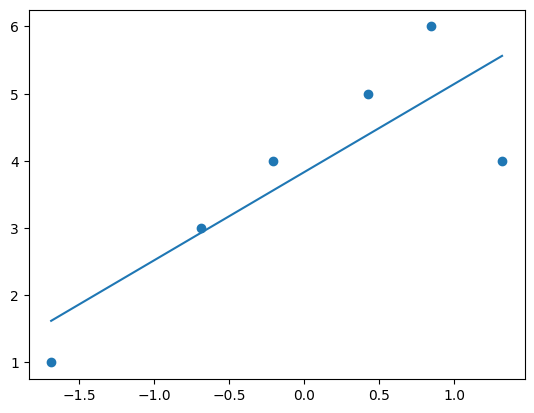

In [16]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],df['RegLin'])
plt.show()

In [17]:
realtor = pd.read_csv('../datasets/realtor-data.csv')
realtor.head(1)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0


In [18]:
features = (realtor
            .groupby(['city','state'])
            .agg({'price':['count','max','min','sum','mean','median']})
            .reset_index())
features.columns = ['city','state','price_count','price_max','price_min','price_sum','price_mean','price_median']
features.head(2)

,city,state,price_count,price_max,price_min,price_sum,price_mean,price_median
0,Acton,Massachusetts,273,13750000.0,319000.0,349564100.0,1.280455e+06,929000.0
1,Adams,Massachusetts,749,495000.0,35000.0,146228300.0,1.952314e+05,170000.0


Utilizando a base "realtor-data.csv" gerar as seguintes features:

maior tamanho de casa por cidade.
menor tamanho de casa por cidade.
tamanho de casa médio por cidade.
porcentagem de missing values do tamanho de casa por cidade.

In [19]:
realtor.head(1)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0


In [20]:
realtor['hs_missing'] = np.where(realtor['house_size'].isnull(),1,0)
realtor.head(1)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,hs_missing
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,0


In [21]:
features1 = (realtor
             .groupby(['city','state'])
             .agg({'house_size':['max','min','mean'],'hs_missing':'mean'})
             .reset_index())
features1.columns = ['city','state','hs_max','hs_min','hs_mean','hs_missing']
features1.head()

,city,state,hs_max,hs_min,hs_mean,hs_missing
0,Acton,Massachusetts,99999.0,918.0,4940.695652,0.157509
1,Adams,Massachusetts,9516.0,640.0,2332.830078,0.316422
2,Adjuntas,Puerto Rico,1527.0,920.0,1214.303030,0.000000
3,Agawam,Massachusetts,3200.0,676.0,1675.292230,0.070644
4,Aguada,Puerto Rico,6000.0,600.0,2139.268116,0.471264


In [22]:
features2 = (realtor
             .groupby(['city','state'])
             .agg({'price':'max','acre_lot':'min'})
             .reset_index())
features2.columns = ['city','state','price_max','acre_lot_min']
features2['rz_price_acre_lot'] = (features2['price_max']/features2['acre_lot_min']).round(1)
features2.loc[features2['acre_lot_min']==0,'rz_price_acre_lot']= -1
features2

,city,state,price_max,acre_lot_min,rz_price_acre_lot
0,Acton,Massachusetts,13750000.0,0.15,91666666.7
1,Adams,Massachusetts,495000.0,0.02,24750000.0
2,Adjuntas,Puerto Rico,105000.0,0.08,1312500.0
3,Agawam,Massachusetts,779900.0,0.11,7090000.0
4,Aguada,Puerto Rico,10000000.0,0.07,142857142.9
...,...,...,...,...,...
577,Worcester,Massachusetts,1795000.0,0.04,44875000.0
578,Worthington,Massachusetts,2995000.0,2.77,1081227.4
579,Wrentham,Massachusetts,1875000.0,0.25,7500000.0
580,Yabucoa,Puerto Rico,380000.0,0.05,7600000.0


In [24]:
df

,X,Y,RegLin,loaded_model
0,-1.688895,1,1.619777,1.619777
1,-0.686114,3,2.934076,2.934076
2,-0.211112,4,3.556639,3.556639
3,0.422224,5,4.386722,4.386722
4,0.844448,6,4.940111,4.940111
5,1.319450,4,5.562674,5.562674


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suponha que você tenha um DataFrame df com suas variáveis independentes (X) e dependente (y)
X = df.drop(columns='target')
y = df['target']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

KeyError: "['target'] not found in axis"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando os resíduos
residuos_train = y_train - y_pred_train
residuos_test = y_test - y_pred_test

# Gráfico dos Resíduos vs. Valores Ajustados
plt.scatter(y_pred_train, residuos_train)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Ajustados')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Histograma dos Resíduos
sns.histplot(residuos_train, kde=True)
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')
plt.show()

# Gráfico Q-Q dos Resíduos
import scipy.stats as stats
stats.probplot(residuos_train, dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()